<a href="https://colab.research.google.com/github/sutummala/breaSwinTNet/blob/main/breasKVis_data_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!sudo add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!sudo apt-get update -qq 2>&1 > /dev/null
!sudo apt -y install -qq google-drive-ocamlfuse 2>&1 > /dev/null
!google-drive-ocamlfuse



debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: www-browser: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: links2: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: elinks: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: links: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: lynx: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: w3m: not found
xdg-open: no method available for opening 'https://accounts.google.com/o/oauth2/auth?client_id=564921029129.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fgd-ocaml-auth.appspot.

In [6]:
!sudo apt-get install -qq w3m # to act as web browser 
!xdg-settings set default-web-browser w3m.desktop # to set default browser
%cd /content
!mkdir drive
%cd drive
!mkdir MyDrive
%cd ..
%cd ..
!google-drive-ocamlfuse /content/drive/MyDrive

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package libgpm2:amd64.
(Reading database ... 155207 files and directories currently installed.)
Preparing to unpack .../libgpm2_1.20.7-5_amd64.deb ...
Unpacking libgpm2:amd64 (1.20.7-5) ...
Selecting previously unselected package w3m.
Preparing to unpack .../w3m_0.5.3-36build1_amd64.deb ...
Unpacking w3m (0.5.3-36build1) ...
Setting up libgpm2:amd64 (1.20.7-5) ...
Setting up w3m (0.5.3-36build1) ...
Processing triggers for mime-support (3.60ubuntu1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.3) ...
/sbin/

In [2]:
!pip install vit-keras
!pip install tensorflow-addons

     |████████████████████████████████| 1.1 MB 14.3 MB/s 


In [ ]:
!git clone https://github.com/rishigami/Swin-Transformer-TF.git

fatal: destination path 'Swin-Transformer-TF' already exists and is not an empty directory.


In [ ]:
import sys
sys.path.append('/content/Swin-Transformer-TF')
from swintransformer import SwinTransformer

In [3]:
import os
import numpy as np
import cv2
import tensorflow as tf
from sklearn.model_selection import RepeatedStratifiedKFold, train_test_split
from vit_keras import vit, utils, visualize

In [ ]:
data_dir_benign = '/content/drive/MyDrive/Datasets/breaKVis/benign/SOB'
data_dir_malignant = '/content/drive/MyDrive/Datasets/breaKVis/malignant/SOB'

In [ ]:
def extract_images(path, sizex, sizey):
  data = []
  folders = sorted(os.listdir(path))
  for folder in folders:
    for final_folder in os.listdir(os.path.join(path, folder)):
      for file in os.listdir(os.path.join(path, folder, final_folder)):
        mat_file = cv2.imread(os.path.join(path, folder, final_folder, file))
        data.append(cv2.resize(mat_file, (sizex, sizey)))
    print(np.array(data).shape)
  return np.array(data)

In [ ]:
benign_folders = os.listdir(data_dir_benign)
malignant_folders = os.listdir(data_dir_malignant)
sizex, sizey = 224, 224

print(f' Resizing the image resolution to: {sizex, sizey}')

# All benign types
#print(f'Extracting benign data at {data_dir_benign}')
for benign_folder in benign_folders:
  if benign_folder == 'fibroadenoma':
    print(f'Extracting images for {benign_folder}')
    print(f'Full path is {os.path.join(data_dir_benign, benign_folder)}')
    fibroadenoma_dir = os.path.join(data_dir_benign, benign_folder)
    fibroadenoma = extract_images(fibroadenoma_dir, sizex, sizey)
  elif benign_folder == 'tubular_adenoma':
    print(f'Extracting images for {benign_folder}')
    print(f'Full path is {os.path.join(data_dir_benign, benign_folder)}')
    tubular_adenoma_dir = os.path.join(data_dir_benign, benign_folder)
    tubular_adenoma = extract_images(tubular_adenoma_dir, sizex, sizey)
  elif benign_folder == 'phyllodes_tumor':
    print(f'Extracting images for {benign_folder}')
    print(f'Full path is {os.path.join(data_dir_benign, benign_folder)}')
    phyllodes_tumor_dir = os.path.join(data_dir_benign, benign_folder)
    phyllodes_tumor = extract_images(phyllodes_tumor_dir, sizex, sizey)
  elif benign_folder == 'adenosis':
    print(f'Extracting images for {benign_folder}')
    print(f'Full path is {os.path.join(data_dir_benign, benign_folder)}')
    adenosis_dir = os.path.join(data_dir_benign, benign_folder)
    adenosis = extract_images(adenosis_dir, sizex, sizey)


# All malignant types
#print(f'Extracting malignant data at {data_dir_malignant}')
for malignant_folder in malignant_folders:
  if malignant_folder == 'ductal_carcinoma':
    print(f'Extracting images for {malignant_folder}')
    print(f'Full path is {os.path.join(data_dir_malignant, malignant_folder)}')
    ductal_carcinoma_dir = os.path.join(data_dir_malignant, malignant_folder)
    ductal_carcinoma = extract_images(ductal_carcinoma_dir, sizex, sizey)
  elif malignant_folder == 'papillary_carcinoma':
    print(f'Extracting images for {malignant_folder}')
    print(f'Full path is {os.path.join(data_dir_malignant, malignant_folder)}')
    papillary_carcinoma_dir = os.path.join(data_dir_malignant, malignant_folder)
    papillary_carcinoma = extract_images(papillary_carcinoma_dir, sizex, sizey)
  elif malignant_folder == 'lobular_carcinoma':
    print(f'Extracting images for {malignant_folder}')
    print(f'Full path is {os.path.join(data_dir_malignant, malignant_folder)}')
    lobular_carcinoma_dir = os.path.join(data_dir_malignant, malignant_folder)
    lobular_carcinoma = extract_images(lobular_carcinoma_dir, sizex, sizey)
  elif malignant_folder == 'mucinous_carcinoma':
    print(f'Extracting images for {malignant_folder}')
    print(f'Full path is {os.path.join(data_dir_malignant, malignant_folder)}')
    mucinous_carcinoma_dir = os.path.join(data_dir_malignant, malignant_folder)
    mucinous_carcinoma = extract_images(mucinous_carcinoma_dir, sizex, sizey)


 Resizing the image resolution to: (224, 224)
Extracting images for fibroadenoma
Full path is /content/drive/MyDrive/Datasets/breaKVis/benign/SOB/fibroadenoma
(142, 224, 224, 3)
(236, 224, 224, 3)
(373, 224, 224, 3)
(494, 224, 224, 3)
(575, 224, 224, 3)
(632, 224, 224, 3)
(700, 224, 224, 3)
(820, 224, 224, 3)
(888, 224, 224, 3)
(1014, 224, 224, 3)
Extracting images for phyllodes_tumor
Full path is /content/drive/MyDrive/Datasets/breaKVis/benign/SOB/phyllodes_tumor
(235, 224, 224, 3)
(393, 224, 224, 3)
(453, 224, 224, 3)
Extracting images for adenosis
Full path is /content/drive/MyDrive/Datasets/breaKVis/benign/SOB/adenosis
(121, 224, 224, 3)
(253, 224, 224, 3)
(383, 224, 224, 3)
(444, 224, 224, 3)
Extracting images for tubular_adenoma
Full path is /content/drive/MyDrive/Datasets/breaKVis/benign/SOB/tubular_adenoma
(65, 224, 224, 3)
(118, 224, 224, 3)
(250, 224, 224, 3)
(374, 224, 224, 3)
(438, 224, 224, 3)
(503, 224, 224, 3)
(569, 224, 224, 3)
Extracting images for ductal_carcinoma
Ful

In [ ]:
# Saving benign tumor matrices
np.save(os.path.join(data_dir_benign, 'fibroadenoma.npy'), fibroadenoma)
np.save(os.path.join(data_dir_benign, 'tubular_adenoma.npy'), tubular_adenoma)
np.save(os.path.join(data_dir_benign, 'phyllodes_tumor.npy'), phyllodes_tumor)
np.save(os.path.join(data_dir_benign, 'adenosis.npy'), adenosis)

# Saving malignant tumor matrices
np.save(os.path.join(data_dir_malignant, 'ductal_carcinoma.npy'), ductal_carcinoma)
np.save(os.path.join(data_dir_malignant, 'papillary_carcinoma.npy'), papillary_carcinoma)
np.save(os.path.join(data_dir_malignant, 'lobular_carcinoma.npy'), lobular_carcinoma)
np.save(os.path.join(data_dir_malignant, 'mucinous_carcinoma.npy'), mucinous_carcinoma)

In [ ]:
# Loading benign tumor matrices
fibroadenoma = np.load(os.path.join(data_dir_benign, 'fibroadenoma.npy'))
tubular_adenoma = np.load(os.path.join(data_dir_benign, 'tubular_adenoma.npy'))
phyllodes_tumor = np.load(os.path.join(data_dir_benign, 'phyllodes_tumor.npy'))
adenosis = np.load(os.path.join(data_dir_benign, 'adenosis.npy'))

# Loading malignant tumor matrices
ductal_carcinoma = np.load(os.path.join(data_dir_malignant, 'ductal_carcinoma.npy'))
papillary_carcinoma = np.load(os.path.join(data_dir_malignant, 'papillary_carcinoma.npy'))
lobular_carcinoma = np.load(os.path.join(data_dir_malignant, 'lobular_carcinoma.npy'))
mucinous_carcinoma = np.load(os.path.join(data_dir_malignant, 'mucinous_carcinoma.npy'))

In [ ]:
fibroadenoma_labels = np.zeros(fibroadenoma.shape[0])
tubular_adenoma_labels = np.ones(tubular_adenoma.shape[0])
phyllodes_tumor_labels = 2*np.ones(phyllodes_tumor.shape[0])
adenosis_labels = 3*np.ones(adenosis.shape[0])
ductal_carcinoma_labels = 4*np.ones(ductal_carcinoma.shape[0])
papillary_carcinoma_labels = 5*np.ones(papillary_carcinoma.shape[0])
lobular_carcinoma_labels = 6*np.ones(lobular_carcinoma.shape[0])
mucinous_carcinoma_labels = 7*np.ones(mucinous_carcinoma.shape[0])

In [ ]:
X = np.concatenate((fibroadenoma, tubular_adenoma, phyllodes_tumor, adenosis, ductal_carcinoma, papillary_carcinoma, lobular_carcinoma, mucinous_carcinoma), axis = 0)
y = np.concatenate((fibroadenoma_labels, tubular_adenoma_labels, phyllodes_tumor_labels, adenosis_labels, ductal_carcinoma_labels, papillary_carcinoma_labels, lobular_carcinoma_labels, mucinous_carcinoma_labels), axis = 0)

In [ ]:
benign_labels = np.zeros(len(fibroadenoma_labels)+len(tubular_adenoma_labels)+len(phyllodes_tumor_labels)+len(adenosis_labels))
malignant_labels = np.ones(len(ductal_carcinoma_labels)+len(papillary_carcinoma_labels)+len(lobular_carcinoma_labels)+len(mucinous_carcinoma_labels))

In [ ]:
y_2class = np.concatenate((benign_labels, malignant_labels))

In [ ]:
print(f'number of samples are {X.shape[0]}')

number of samples are 7909


In [ ]:
X = vit.preprocess_inputs(X)
print(np.min(X))
print(np.max(X))

-1.0
1.0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
# Saving 2 class 
np.save('/content/drive/MyDrive/Datasets/breaKVis/8class_all_data/x_train.npy', x_train)
np.save('/content/drive/MyDrive/Datasets/breaKVis/8class_all_data/y_train.npy', y_train)
np.save('/content/drive/MyDrive/Datasets/breaKVis/8class_all_data/x_test.npy', x_test)
np.save('/content/drive/MyDrive/Datasets/breaKVis/8class_all_data/y_test.npy', y_test)

In [8]:
# Load 8 classes
#x_train = np.load('/content/drive/MyDrive/Datasets/breaKVis/8class_all_data/x_train.npy')
y_train = np.load('/content/drive/MyDrive/Datasets/breaKVis/8class_all_data/y_train.npy')
x_test = np.load('/content/drive/MyDrive/Datasets/breaKVis/8class_all_data/x_test.npy')
y_test = np.load('/content/drive/MyDrive/Datasets/breaKVis/8class_all_data/y_test.npy')

In [ ]:
IMAGE_SIZE = [x_train.shape[1], x_train.shape[1], 3]
NUM_CLASSES = 8

swin_vit = SwinTransformer('swin_large_224', include_top=False, pretrained=True)

model = tf.keras.Sequential()
model.add(tf.keras.Input(shape = IMAGE_SIZE))
model.add(swin_vit)
model.add(tf.keras.layers.Dense(NUM_CLASSES, activation='softmax'))

model.build(IMAGE_SIZE)

722608128/722592300 [==============================] - 7s 0us/step


In [ ]:
model.summary()

model.compile(optimizer = tf.keras.optimizers.Adadelta(learning_rate = 0.1), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 swin_large_224 (SwinTransfo  (None, 1536)             195331616 
 rmerModel)                                                      
                                                                 
 dense_9 (Dense)             (None, 8)                 12296     
                                                                 
Total params: 195,343,912
Trainable params: 195,007,772
Non-trainable params: 336,140
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, batch_size = 8, epochs = 15, validation_split = 0.10)

Epoch 1/15
623/623 [==============================] - 400s 579ms/step - loss: 0.8984 - accuracy: 0.6778 - val_loss: 0.7082 - val_accuracy: 0.7545
Epoch 2/15
623/623 [==============================] - 349s 560ms/step - loss: 0.3275 - accuracy: 0.8804 - val_loss: 0.4652 - val_accuracy: 0.8285
Epoch 3/15
623/623 [==============================] - 347s 558ms/step - loss: 0.1600 - accuracy: 0.9420 - val_loss: 0.3260 - val_accuracy: 0.8736
Epoch 4/15
623/623 [==============================] - 347s 557ms/step - loss: 0.0888 - accuracy: 0.9667 - val_loss: 0.2585 - val_accuracy: 0.9116
Epoch 5/15
623/623 [==============================] - 347s 557ms/step - loss: 0.0630 - accuracy: 0.9733 - val_loss: 0.2746 - val_accuracy: 0.9170
Epoch 6/15
623/623 [==============================] - 347s 557ms/step - loss: 0.0406 - accuracy: 0.9827 - val_loss: 0.2995 - val_accuracy: 0.9079
Epoch 7/15
623/623 [==============================] - 346s 556ms/step - loss: 0.0356 - accuracy: 0.9849 - val_loss: 0.3660 -

In [ ]:
model.evaluate(x_test, y_test)

75/75 [==============================] - 48s 635ms/step - loss: 0.3229 - accuracy: 0.9279


[0.32292842864990234, 0.9279392957687378]

In [ ]:
model.save('/content/drive/MyDrive/Datasets/breaKVis/trained_models/svit_large_224_8class_allX')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Datasets/breaKVis/trained_models/svit_large_224_8class_allX/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Datasets/breaKVis/trained_models/svit_large_224_8class_allX/assets


In [7]:
model_tiny = tf.keras.models.load_model('/content/drive/MyDrive/Datasets/breaKVis/trained_models/svit_tiny_224_8class_allX')
model_small = tf.keras.models.load_model('/content/drive/MyDrive/Datasets/breaKVis/trained_models/svit_small_224_8class_allX')
model_base = tf.keras.models.load_model('/content/drive/MyDrive/Datasets/breaKVis/trained_models/svit_base_224_8class_allX')
model_large = tf.keras.models.load_model('/content/drive/MyDrive/Datasets/breaKVis/trained_models/svit_large_224_8class_allX')

In [9]:
y_pred_tiny = model_tiny.predict(x_test)
y_pred_small = model_small.predict(x_test)
y_pred_base = model_base.predict(x_test)
y_pred_large = model_large.predict(x_test)

In [10]:
y_pred = np.zeros(np.shape(y_pred_tiny))

for i in range(len(y_test)):
  y_pred[i, :] = 0.25*(y_pred_tiny[i, :] + y_pred_small[i, :] + y_pred_base[i, :] + y_pred_large[i, :])

print(y_pred[0, :])

[4.64996583e-06 9.99992609e-01 1.35005322e-08 8.01364237e-08
 2.52983455e-07 2.23177246e-08 1.89858133e-06 4.23505469e-07]


In [11]:
y_prob = np.argmax(y_pred, axis = 1)

In [12]:
import sklearn
import matplotlib.pyplot as plt

In [14]:
print(f'Accuracy {sklearn.metrics.accuracy_score(y_test, y_prob)}')
AUC = sklearn.metrics.roc_auc_score(y_test, y_pred, average = 'weighted', multi_class='ovr')
print(f'AUC is {AUC}')
#target_names = ['beningn', 'malignant']
target_names = ['fibroadenoma', 'tubular_adenoma', 'phyllodes_tumor', 'adenosis', 'ductal_carcinoma', 'papillary_carcinoma', 'lobular_carcinoma', 'mucinous_carcinoma']
print('F1-score', sklearn.metrics.f1_score(y_test, y_prob, average = 'micro'))
print(f'Balanced accuracy {sklearn.metrics.balanced_accuracy_score(y_test, y_prob)}')
print(f'MCC {sklearn.metrics.matthews_corrcoef(y_test, y_prob)}')
print(f'{sklearn.metrics.classification_report(y_test, y_prob, target_names=target_names)}')

Accuracy 0.9367888748419722
AUC is 0.9944340153323826
F1-score 0.9367888748419722
Balanced accuracy 0.9199453279364909
MCC 0.9166335214599615
                     precision    recall  f1-score   support

       fibroadenoma       0.93      0.96      0.95       311
    tubular_adenoma       0.99      0.99      0.99       175
    phyllodes_tumor       0.93      0.86      0.89       108
           adenosis       0.99      1.00      1.00       134
   ductal_carcinoma       0.94      0.96      0.95      1029
papillary_carcinoma       0.99      0.93      0.96       181
  lobular_carcinoma       0.73      0.72      0.73       179
 mucinous_carcinoma       0.98      0.94      0.96       256

           accuracy                           0.94      2373
          macro avg       0.94      0.92      0.93      2373
       weighted avg       0.94      0.94      0.94      2373



[[9.61414791e-01 3.21543408e-03 2.25080386e-02 0.00000000e+00
  3.21543408e-03 0.00000000e+00 3.21543408e-03 6.43086817e-03]
 [1.14285714e-02 9.88571429e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.20370370e-01 0.00000000e+00 8.61111111e-01 0.00000000e+00
  0.00000000e+00 9.25925926e-03 9.25925926e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.71817298e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
  9.58211856e-01 9.71817298e-04 3.98445092e-02 0.00000000e+00]
 [1.65745856e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  4.97237569e-02 9.28176796e-01 0.00000000e+00 5.52486188e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.73743017e-01 0.00000000e+00 7.20670391e-01 5.58659218e-03]
 [7.81250000e-03 0.00000000e+00 0.00000000e+00 3.90625000e-03
  3.12500000e-02 0.00000000e+00 1.56250000e-02 9.41406250e-01]]

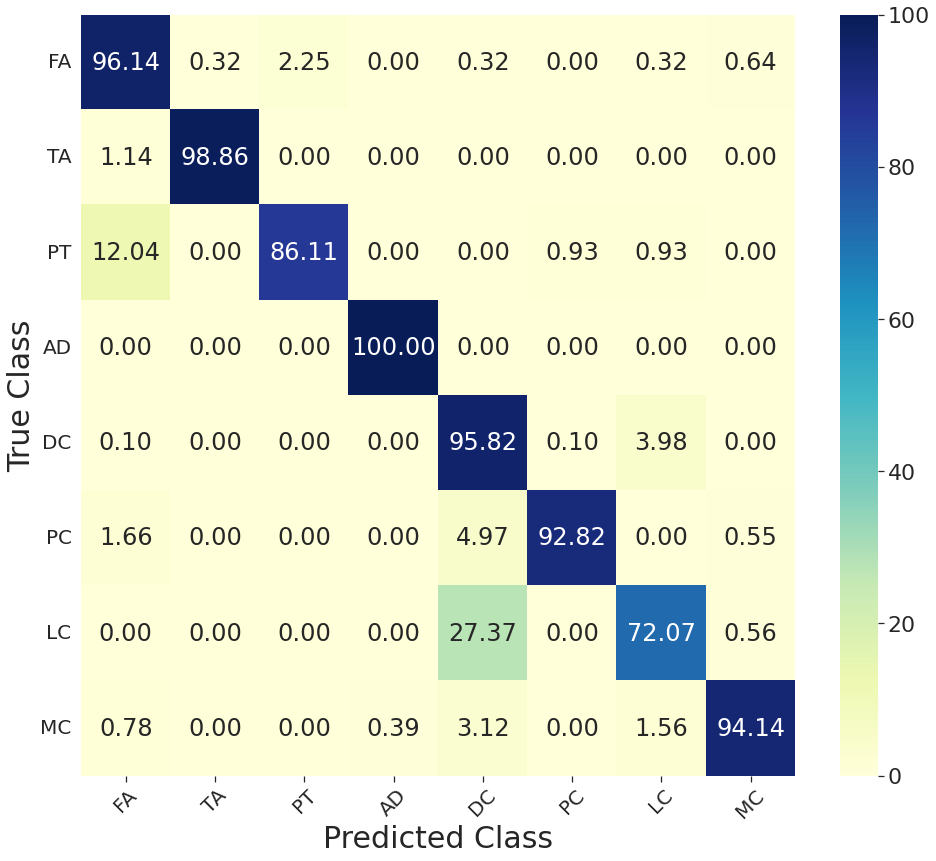

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion_mat = confusion_matrix(y_test, y_prob, normalize = 'true')
#confusion_mat[1, 0] = 6
#confusion_mat[1, 1] = 296
class_names = ['FA', 'TA', 'PT', 'AD', 'DC', 'PC', 'LC', 'MC']
print(confusion_mat)

# Plotting multilabel confusion matrix in a beautiful manner
sns.set(font_scale=2)
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(confusion_mat*100, annot=True, vmin = 0, vmax = 100, ax = ax, cmap = 'YlGnBu', fmt = '2.2f'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted Class', fontsize=30)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=45)
ax.xaxis.set_ticklabels(class_names, fontsize = 20)
ax.xaxis.tick_bottom()

ax.set_ylabel('True Class', fontsize=30)
ax.yaxis.set_ticklabels(class_names, fontsize = 20)
plt.yticks(rotation=0)

#plt.title('Confusion Matrix 224', fontsize=25)

plt.show()